# 1. Вязкость

## 1.1 Вязкость дегазированной нефти, корреляция Стендинга
$$
\mu_o = (0,32 + \frac{1,8 *10^7}{\gamma_{API}^{4,53}})(\frac{360}{1,8T-260})^a
$$
где:

$\gamma_{API} = \frac{141,5}{\gamma_o} - 131,5$ - плотность нефти в $^\circ API$

$a = 10^{0,43 + 8,33 / \gamma_{API}} $

T - температура в $^\circ K$

Графическая корреляция была установлена Билом. Математическую интерполяции корреляции Била дал Стендинг.


$\textbf{Источник}$ : $\underline{Дж.П. Брилл, Х.Мукеражди "Многофазный~поток~в~скважинах"}$



In [24]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
from math import *

In [7]:
# Функция для построения графиков
def prep_plot(func,t_set,gamma_o,plot_title,plot_xlab,plot_ylab):
    for t in t_set:
        visc__cP = dead_oil_viscosity__Standing(gamma_o_set, t)
        plt.plot([go*1000 for go in gamma_o_set], visc__cP, label='t=%1.0f$^{\circ}\mathrm{C}$'%t)
    plt.legend()
    plt.title(plot_title)
    plt.xlabel(plot_xlab)
    plt.ylabel(plot_ylab)

In [33]:
# Функция рассчитывающая вязкость по Стендингу
def get_dead_oil_viscosity__Standing(gamma_o, t__C):
    gamma_API = 141.5 / gamma_o - 131.5
    viscosity__cP = (0.32 + 1.8 * (10 ** 7) / (gamma_API ** 4.53)) * \
    (360 / (1.8 * (t__C + 273) - 260)) ** (10 ** (0.43 + 8.33 / (gamma_API)))
    return viscosity__cP

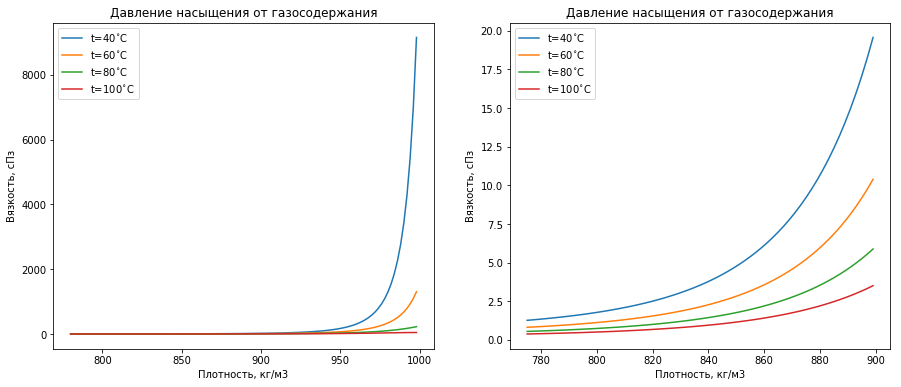

In [34]:
# Код для построения графиков
plt.figure(figsize=(15,6))
t_set = np.array(range(40, 120, 20))
gamma_o_set = np.arange( 0.78, 1, 0.002)

# Рисуем первый график
plt.subplot(121)
prep_plot(func=get_dead_oil_viscosity__Standing, t_set=t_set, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

# Рисуем второй график(для наглядности ограничиваем плотность дегазированной нефти)    
plt.subplot(122)
gamma_o_set = np.arange( 0.775, 0.9, 0.002)
prep_plot(func=get_dead_oil_viscosity__Standing, t_set=t_set, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')
plt.show()

## 1.2 Вязкость дегазированной нефти, корреляция Беггза и Робинсона
$$
\mu_o = 10 ^ x -1
$$

$$
x = \frac{10 ^{3,0324 - 0,02023 \gamma_{API}}}{(1,8T + 32)^{1,163}}
$$

где:

$\gamma_{API} = \frac{141,5}{\gamma_o} - 131,5$ - плотность нефти в $^\circ API$

T - температура в $^\circ C$


$\textbf{Источник}$ : $\underline{Дж.П. Брилл, Х.Мукеражди "Многофазный~поток~в~скважинах"}$





In [31]:
# функция расчитывающая вязкость
def get_dead_oil_viscosity__Beggs(gamma_o, t__C):
    gamma_API = 141.5 / gamma_o - 131.5
    x = 10 ** (3.0324 - 0.02023 * gamma_API) / \
    (1.8 * (t__C) + 32) ** 1.163
    viscosity__cP = 10 ** x - 1
    return viscosity__cP

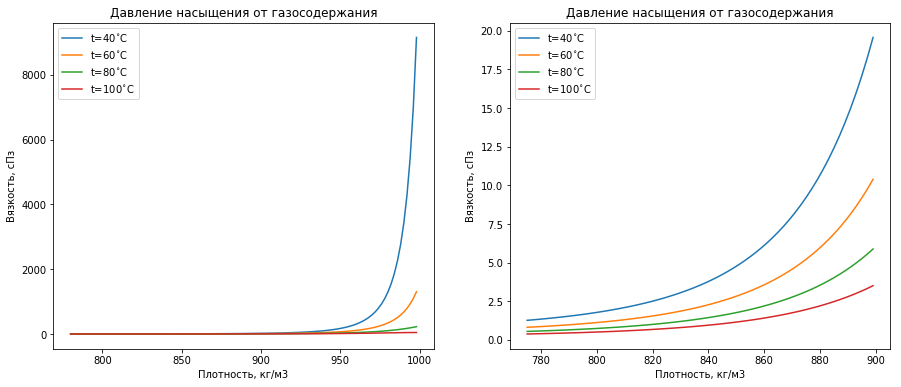

In [32]:
# Входные параметры
t_set = np.array(range(40, 120, 20))
gamma_o_set = np.arange( 0.78, 1, 0.002)

# Рисуем график
plt.figure(figsize=(15,6))

plt.subplot(121)
prep_plot(func=get_dead_oil_viscosity__Beggs, t_set=t_set, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

# Для наглядности ограничиваем плотность нефти 
gamma_o_set = np.arange( 0.775, 0.9, 0.002)
plt.subplot(122)
prep_plot(func=get_dead_oil_viscosity__Beggs, t_set=t_set, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

## 1.3 Вязкость дегазированной нефти, корреляция Гласe
$$
\mu_o = 3.141 * 10 ^{10} * (1,8T +32)^{-3,444} (\lg\gamma_{API})^{a}
$$

где:

$
a = 10,313\lg(1,8T+32)-36,447 
$

$\gamma_{API} = \frac{141,5}{\gamma_o} - 131,5$ - плотность нефти в $^\circ API$

T - температура в $^\circ C$



<font color='blue'> Методика справедлива в интервале</font>: 
\begin{align*}
10 < T < 149; \\
20,1 < \gamma_{API} < 48,1
\end{align*}



$\textbf{Источник}$ : $\underline{Дж.П. Брилл, Х.Мукеражди "Многофазный~поток~в~скважинах"}$

In [43]:
def get_dead_oil_viscosity__Glaso(gamma_o, t__C):
    gamma_API = 141.5 / gamma_o - 131.5
    a = 10.313 * log10(1.8 * t__C + 32) - 36.447
    viscosity__cP = (3.141 * 10**10)* (1.8 * t__C + 32)**(-3.444) * (log10(gamma_API))**a
    return viscosity__cP

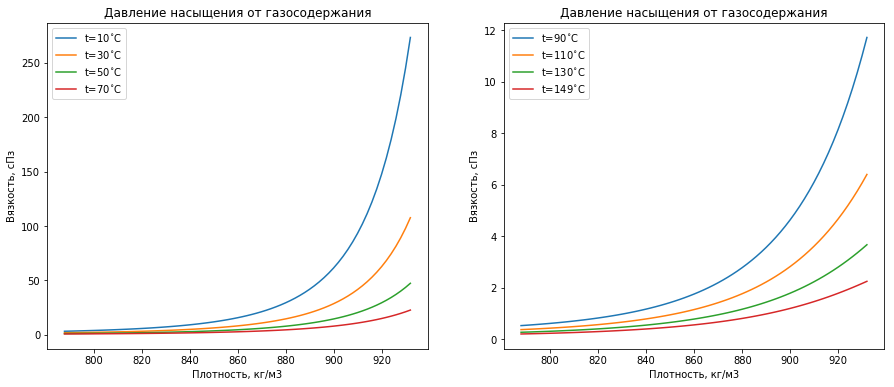

In [42]:
# Входные параметры
t_set1 = np.array(range(10, 90, 20))
gamma_o_set = np.arange(0.7879,0.9334, 0.002)
t_set2 = np.array([90, 110, 130, 149])

# Рисуем графики
plt.figure(figsize=(15,6))

plt.subplot(121)
prep_plot(func=get_dead_oil_viscosity__Glaso, t_set=t_set1, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

plt.subplot(122)
prep_plot(func=get_dead_oil_viscosity__Glaso, t_set=t_set2, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

## 1.4 Вязкость дегазированной нефти, корреляция Картоатмодью и Шмидта
$$
\mu_o = (16 * 10^8)(1,8T +32)^{-2,8177} (\lg\gamma_{API})^{a}
$$

где:

$
a = 5,7526\lg(1,8T+32)-26,9718 
$

$\gamma_{API} = \frac{141,5}{\gamma_o} - 131,5$ - плотность нефти в $^\circ API$

T - температура в $^\circ C$

Данная методика обьединяет корреляции 1.1 - 1.3

$\textbf{Источник}$ : $\underline{Дж.П. Брилл, Х.Мукеражди "Многофазный~поток~в~скважинах"}$


In [44]:
def get_dead_oil_viscosity__Schmidt(gamma_o, t__C):
    gamma_API = 141.5 / gamma_o - 131.5
    a = 5.7526 * log10(1.8 * t__C + 32) - 26.9718
    viscosity__cP = (16 * 10**8)* (1.8 * t__C + 32)**(-2.8177) * (log10(gamma_API))**a
    return viscosity__cP

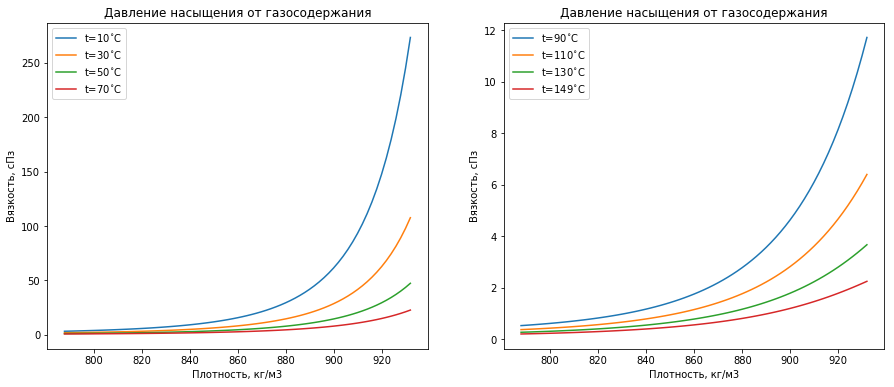

In [46]:
# Входные параметры
t_set1 = np.array(range(10, 90, 20))
gamma_o_set = np.arange(0.7879,0.9334, 0.002)
t_set2 = np.array([90, 110, 130, 149])

# Рисуем графики
plt.figure(figsize=(15,6))

plt.subplot(121)
prep_plot(func=get_dead_oil_viscosity__Schmidt, t_set=t_set1, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')

plt.subplot(122)
prep_plot(func=get_dead_oil_viscosity__Schmidt, t_set=t_set2, gamma_o=gamma_o_set, 
          plot_title='Давление насыщения от газосодержания', 
          plot_xlab='Плотность, кг/м3',plot_ylab='Вязкость, сПз')